In [146]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [147]:
train=pd.read_csv("train.csv")
df1=pd.DataFrame(train)
test=pd.read_csv("test.csv")
df2=pd.DataFrame(test)

In [148]:
df2.rename(columns={'Personality (class label)': 'Personality (Class label)'}, inplace=True)

In [149]:
df=pd.concat([df1,df2])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [150]:
df.Gender.unique()

array(['Male', 'Female', '5'], dtype=object)

In [151]:
from sklearn.impute import SimpleImputer

imputeC = SimpleImputer(missing_values="5", strategy="most_frequent")

imputed_gender_data = imputeC.fit_transform(df[['Gender']])

imputed_gender_data = imputed_gender_data.reshape(-1)

df['Gender'] = imputed_gender_data


In [152]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [153]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})


df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,0,17,7,4,7,3,2,extraverted
1,0,19,4,5,4,6,6,serious
2,1,18,7,6,4,5,5,dependable
3,1,22,5,6,7,4,3,extraverted
4,1,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,extraverted
311,0,18,2,5,8,3,7,dependable
312,0,18,7,5,6,2,7,serious
313,0,23,6,7,5,4,3,extraverted


In [154]:
df['Personality'] = df['Personality (Class label)'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})

df.drop(["Personality (Class label)"],axis=1, inplace=True)
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,1
1,0,19,4,5,4,6,6,4
2,1,18,7,6,4,5,5,0
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,2
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,1
311,0,18,2,5,8,3,7,0
312,0,18,7,5,6,2,7,4
313,0,23,6,7,5,4,3,1


In [155]:
df.isna().sum()

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

In [156]:
df.dtypes

Gender               int64
Age                  int64
openness             int64
neuroticism          int64
conscientiousness    int64
agreeableness        int64
extraversion         int64
Personality          int64
dtype: object

In [157]:
df.groupby(by=['Personality', 'Age']).mean()

Gender  openness  neuroticism  conscientiousness  \
Personality Age                                                       
0           17   0.666667  5.583333     5.000000           4.833333   
            18   0.621622  5.108108     4.918919           4.783784   
            19   0.583333  4.916667     4.666667           4.791667   
            20   0.562500  5.250000     5.125000           5.750000   
            21   0.571429  5.285714     4.714286           4.857143   
...                   ...       ...          ...                ...   
4           24   0.400000  4.866667     4.466667           5.133333   
            25   0.500000  5.125000     3.875000           5.375000   
            26   0.333333  3.833333     4.833333           4.500000   
            27   0.000000  4.000000     5.000000           5.000000   
            28   0.000000  2.500000     6.000000           6.000000   

                 agreeableness  extraversion  
Personality Age                               
0           17        5.416667      4.333333  
            18        4.891892      4.945946  
            19        4.687500      4.583333  
            20        4.250000      4.750000  
            21        4.500000      4.428571  
...                        ...           ...  
4           24        3.933333      5.666667  
            25        4.625000      5.250000  
            26        5.333333      4.833333  
            27        6.000000      5.000000  
            28        2.000000      5.000000  

[61 rows x 6 columns]

<Axes: >

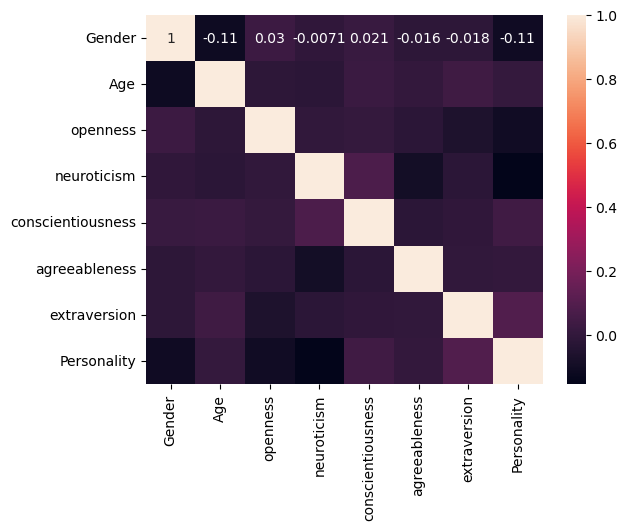

In [158]:
sns.heatmap(df.corr(), annot=True)

In [159]:
df.skew()

Gender              -0.097916
Age                  0.471614
openness            -0.638642
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness       -0.552094
extraversion        -0.359830
Personality         -0.140035
dtype: float64

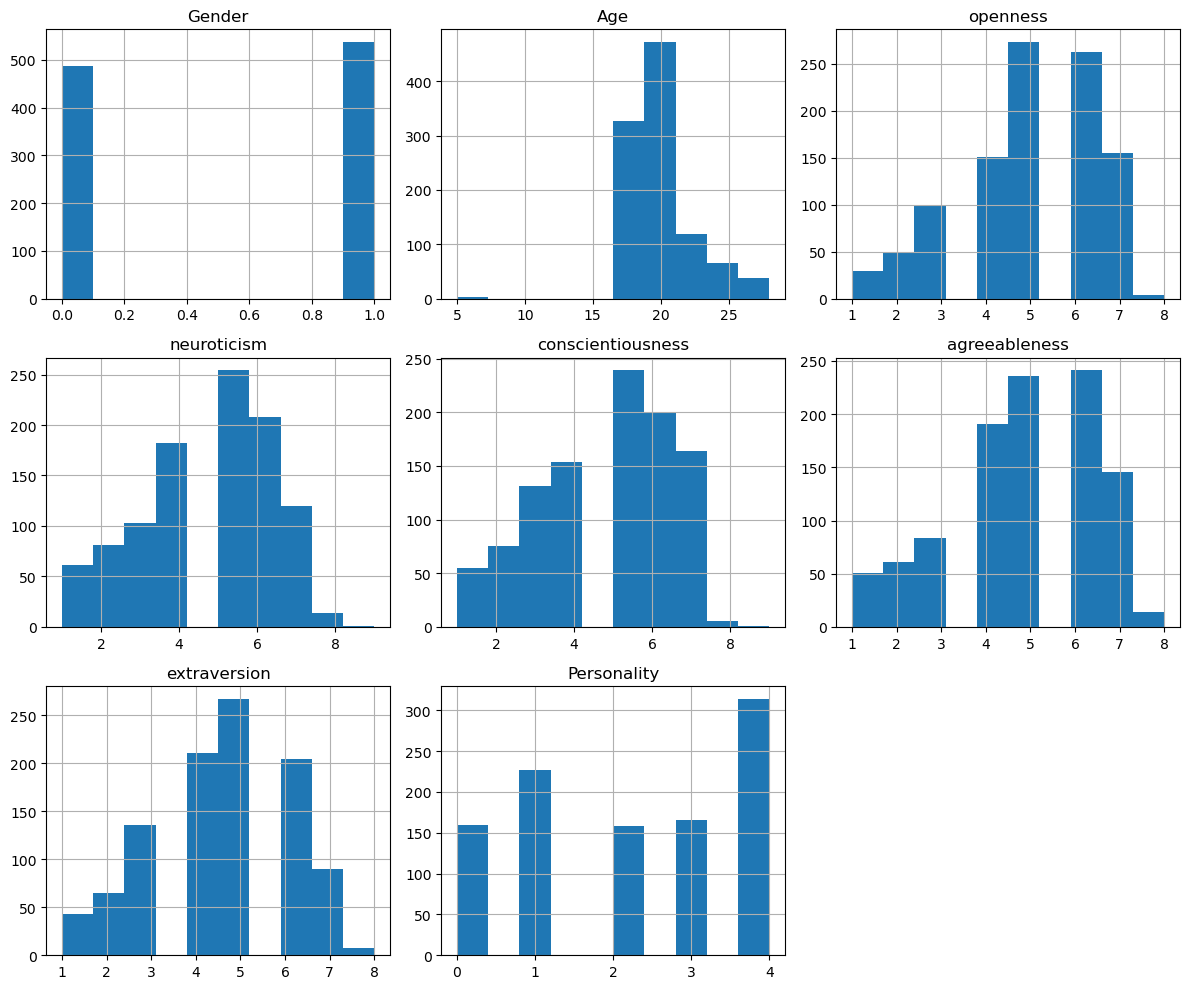

In [160]:
df.hist(figsize=(12, 10))
plt.tight_layout() 
plt.show()

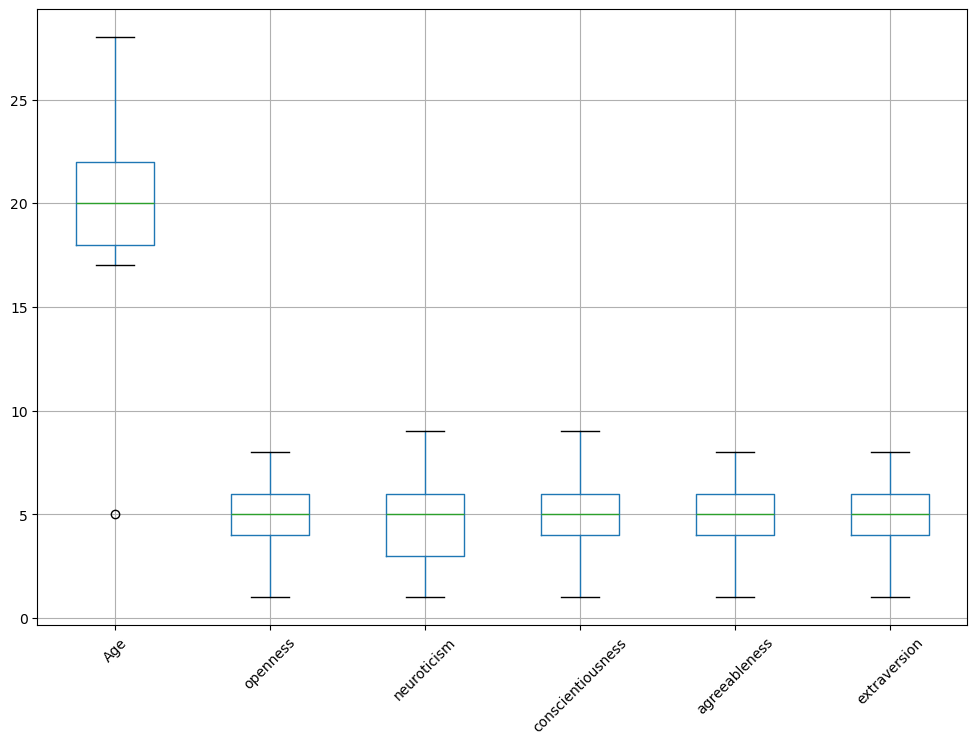

In [161]:
df2.boxplot(figsize=(12, 8))
plt.xticks(rotation=45) 
plt.show()

(array([   0.,    0.,    0.,    0.,    0., 1024.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

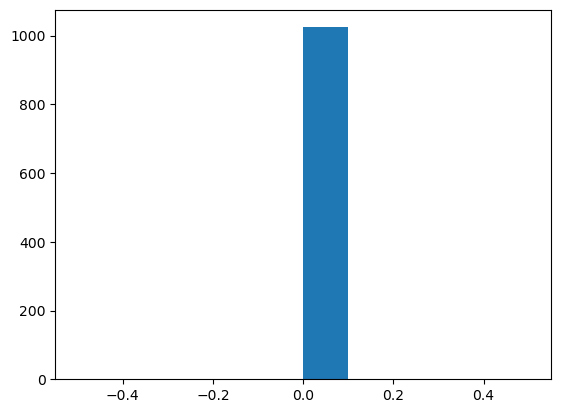

In [162]:
x = np.reciprocal(df['Age'])
plt.hist(x)

(array([  3.,   0.,   0.,   0.,   0.,   0., 599., 199., 152.,  71.]),
 array([2.23606798, 2.54161144, 2.84715491, 3.15269837, 3.45824184,
        3.7637853 , 4.06932876, 4.37487223, 4.68041569, 4.98595916,
        5.29150262]),
 <BarContainer object of 10 artists>)

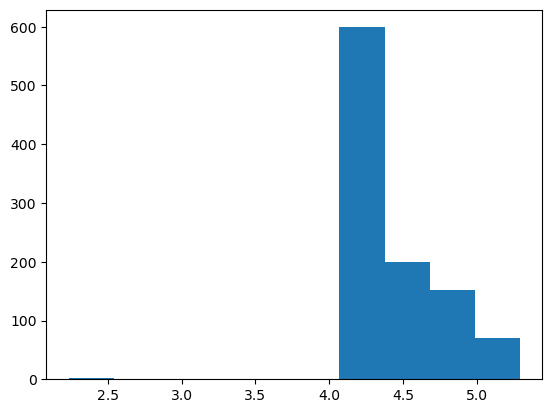

In [163]:
x = np.sqrt(df['Age'])
plt.hist(x)

(array([  3.,   0.,   0.,   0.,   0.,   0., 326., 472., 152.,  71.]),
 array([1.70997595, 1.84263725, 1.97529855, 2.10795985, 2.24062116,
        2.37328246, 2.50594376, 2.63860506, 2.77126637, 2.90392767,
        3.03658897]),
 <BarContainer object of 10 artists>)

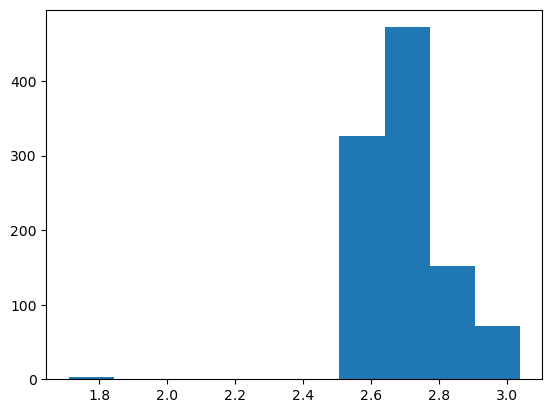

In [164]:
x = np.cbrt(df['Age'])
plt.hist(x)

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0., 599., 318., 104.]),
 array([1.60943791, 1.78171457, 1.95399123, 2.12626789, 2.29854455,
        2.47082121, 2.64309787, 2.81537453, 2.98765119, 3.15992785,
        3.33220451]),
 <BarContainer object of 10 artists>)

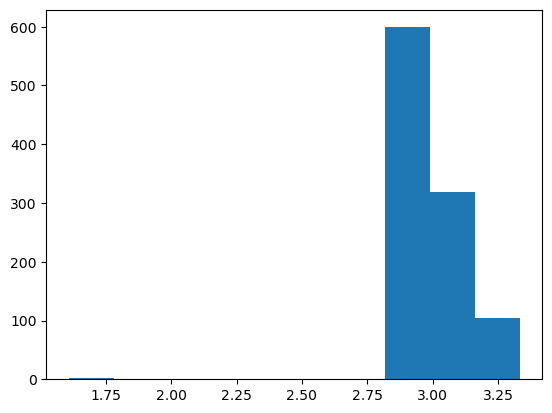

In [165]:
x = np.log(df['Age'])
plt.hist(x)

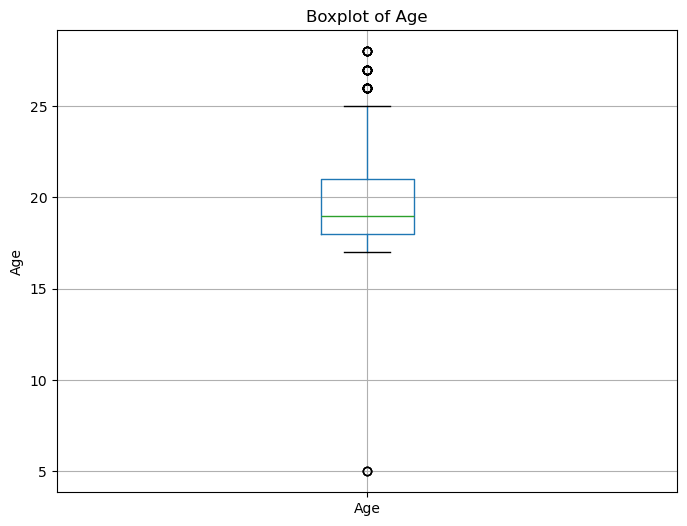

In [166]:
df.boxplot(column='Age', figsize=(8, 6))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [167]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr= q3-q1

In [168]:
upper = q3+ (iqr*1.5)
lower = q1- (iqr*1.5)

print(lower)
print(upper)
print(iqr)

13.5
25.5
3.0


In [169]:
dff = df[(df.Age > lower) & (df.Age < upper)]

In [170]:
dff.shape

(983, 8)

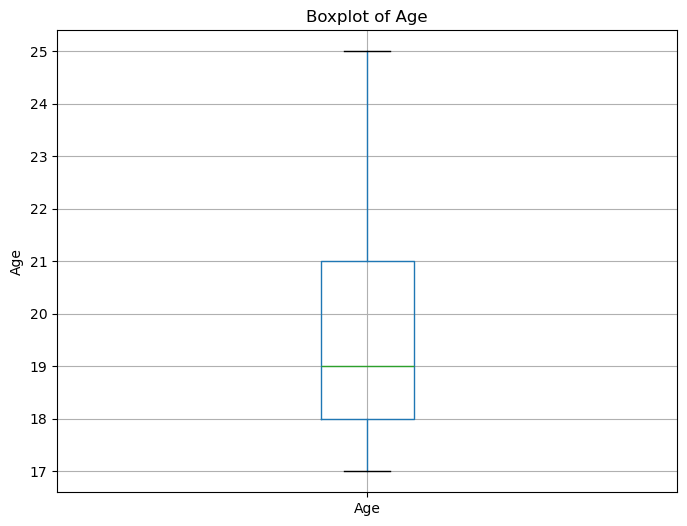

In [171]:
dff.boxplot(column='Age', figsize=(8, 6))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

# Outlier Detection

In [172]:
# d_df=df.drop(['Personality'], axis=1)
# d_df["target"]= df['Personality']
# label = d_df.target.unique()

# a=df[d_df.target==label[0]]
# b=df[d_df.target==label[1]]
# label

In [173]:
# q1=df.groupby(['Personality'],sort=[label]).quantile(0.25)
# q3=df.groupby(['Personality'],sort=[label]).quantile(0.75)
# iqr= q3-q1

In [174]:
# upper = q3+ (iqr*1.5)
# lower = q1- (iqr*1.5)

# print(pd.DataFrame(lower))
# print(pd.DataFrame(upper))

In [175]:
# a = a[(a.openness < 9)&(a.openness > 1)] 

In [176]:
# a = a[(a.neuroticism < 10.5)&(a.neuroticism > -1.5)]

In [177]:
# a = a[(a.conscientiousness < 9)&(a.conscientiousness > 1)]

In [178]:
# a = a[(a.agreeableness < 9)&(a.agreeableness > 1)] 

In [179]:
# a = a[(a.extraversion < 9)&(a.extraversion > 1)]

In [180]:
# b = b[(b.openness < 9)&(b.openness > 1)]

In [181]:
# b = b[(b.neuroticism < 9)&(b.neuroticism > 1)]

In [182]:
# b = b[(b.conscientiousness < 10.5)&(b.conscientiousness > -1.5)] 

In [183]:
# b = b[(b.agreeableness < 9)&(b.agreeableness > 1)] 

In [184]:
# b = b[(b.extraversion < 10.5)&(b.extraversion > -1.5)] 

In [185]:
# df= pd.concat([a,b], axis= 0)
# df.shape

In [186]:
# df.head()

# Feature Transformation

In [187]:
# df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
# df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
# df.skew()

In [188]:
df.columns

Index(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality'],
      dtype='object')

# Model Training

In [189]:
x=df.drop(["Personality"],axis=1)

y=df["Personality"]

In [190]:
from sklearn.preprocessing import RobustScaler
RobSca= RobustScaler()
rcdata= RobSca.fit_transform(x)

rcdf= pd.DataFrame(rcdata, columns= x.columns)
rcdf.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,-1.0,-0.666667,1.0,-0.5,0.666667,-1.0,-1.5
1,-1.0,0.000000,-0.5,0.0,-0.333333,0.5,0.5
2,0.0,-0.333333,1.0,0.5,-0.333333,0.0,0.0
3,0.0,1.000000,0.0,0.5,0.666667,-0.5,-1.0
4,0.0,0.000000,1.0,-0.5,0.333333,0.0,-0.5


In [191]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
mdata= minmax.fit_transform(x)

mdf= pd.DataFrame(mdata, columns= x.columns)
mdf.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,0.0,0.521739,0.857143,0.375,0.750,0.285714,0.142857
1,0.0,0.608696,0.428571,0.500,0.375,0.714286,0.714286
2,1.0,0.565217,0.857143,0.625,0.375,0.571429,0.571429
3,1.0,0.739130,0.571429,0.625,0.750,0.428571,0.285714
4,1.0,0.608696,0.857143,0.375,0.625,0.571429,0.428571


In [192]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sdata=sc.fit_transform(x)
sdf = pd.DataFrame(sdata, columns=x.columns)
sdf

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,-1.050081,-1.118659,1.332469,-0.367643,1.332579,-1.105651,-1.652627
1,-1.050081,-0.335674,-0.634539,0.217841,-0.402032,0.703917,0.921198
2,0.952308,-0.727166,1.332469,0.803325,-0.402032,0.100728,0.277742
3,0.952308,0.838803,0.021130,0.803325,1.332579,-0.502461,-1.009171
4,0.952308,-0.335674,1.332469,-0.367643,0.754375,0.100728,-0.365714
...,...,...,...,...,...,...,...
1019,0.952308,-0.335674,0.676799,0.217841,0.754375,-0.502461,-1.009171
1020,-1.050081,-0.727166,-1.945878,0.217841,1.910783,-1.105651,1.564654
1021,-1.050081,-0.727166,1.332469,0.217841,0.754375,-1.708840,1.564654
1022,-1.050081,1.230295,0.676799,1.388809,0.176171,-0.502461,-1.009171


In [193]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, random_state=2,stratify=y)


In [194]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [195]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.3804878048780488


In [196]:
rX_train, rX_test, y_train, y_test = train_test_split(rcdf, y , test_size = 0.20, random_state=2,stratify=y)


In [197]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(rX_train, y_train)

LogisticRegression()

In [198]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(rX_test)

print(accuracy_score(y_test, y_pred))

0.37073170731707317


In [199]:
mmX_train, mmX_test, y_train, y_test = train_test_split(mdf, y , test_size = 0.20, random_state=2,stratify=y)


In [200]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(mmX_train, y_train)

LogisticRegression()

In [201]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(mmX_test)

print(accuracy_score(y_test, y_pred))

0.36585365853658536


In [202]:
sX_train, sX_test, y_train, y_test = train_test_split(sdf, y , test_size = 0.20, random_state=2,stratify=y)


In [203]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(sX_train, y_train)

LogisticRegression()

In [204]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(sX_test)

print(accuracy_score(y_test, y_pred))

0.37073170731707317


In [205]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [206]:

train_accuracy = model.score(X_train, y_train)
print("Accuracy on training set:", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print("Accuracy on testing set:", test_accuracy)

Accuracy on training set: 0.05626450561091312
Accuracy on testing set: 0.04541203086631962


In [207]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [208]:
# polylr = LinearRegression()

# polylr.fit(X_train_poly,y_train)

In [209]:
# y_hat = model.predict(X_train)

In [210]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [211]:
# polylr = LinearRegression()

# polylr.fit(X_train_poly,y_train)

In [212]:
# print("Train score:", polylr.score(X_train_poly,y_train))
# print("Test score:", polylr.score(X_test_poly,y_test))

In [213]:
XM_train_poly = poly.fit_transform(X_train)
XM_test_poly = poly.fit_transform(X_test)

In [214]:
# polymlr = LinearRegression()
# polymlr.fit(XM_train_poly,y_train)

In [215]:
# print("Train score:", polymlr.score(XM_train_poly,y_train))
# print("Test score:", polymlr.score(XM_test_poly,y_test))

In [216]:
from sklearn.linear_model import RidgeClassifier

rmodel = RidgeClassifier(alpha = 10000)

rmodel.fit(XM_train_poly, y_train)

RidgeClassifier(alpha=10000)

In [217]:
print("Train score:", rmodel.score(XM_train_poly,y_train))
print("Test score:", rmodel.score(XM_test_poly,y_test))

Train score: 0.4078144078144078
Test score: 0.3804878048780488


In [218]:
from sklearn.linear_model import Lasso

lmodel = Lasso(alpha = 0.1)

lmodel.fit(XM_train_poly, y_train)

Lasso(alpha=0.1)

In [219]:
print("Train score:", lmodel.score(XM_train_poly,y_train))
print("Test score:", lmodel.score(XM_test_poly,y_test))

Train score: 0.07004427970396876
Test score: 0.04797861130745584


In [220]:
from sklearn.tree import DecisionTreeClassifier

model_Tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

model_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [221]:

from sklearn.neighbors import KNeighborsClassifier

model_K = KNeighborsClassifier(n_neighbors=5)


model_K.fit(X_train, y_train)

KNeighborsClassifier()

In [222]:
print("Train and Test score for Decision Tree model\n")

print("Train score:", model_Tree.score(X_train, y_train))

print("Test score:", model_Tree.score(X_test, y_test))

Train and Test score for Decision Tree model

Train score: 0.9963369963369964
Test score: 0.24878048780487805


In [223]:
from sklearn.metrics import confusion_matrix

y_pred = model_Tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 6  6  6  5  9]
 [ 7 13  3 10 12]
 [ 4  3 13  5  7]
 [ 6  7  8  4  8]
 [16 15  8  9 15]]


In [224]:
print("Train and Test score for KNN\n")

print("Train score:", model_K.score(X_train, y_train))

print("Test score:", model_K.score(X_test, y_test))

Train and Test score for KNN

Train score: 0.5213675213675214
Test score: 0.3170731707317073


In [225]:
from sklearn.metrics import confusion_matrix

y_pred = model_K.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9 10  3  3  7]
 [ 8 15  3  7 12]
 [ 4 11 12  0  5]
 [ 8 10  4  6  5]
 [12 10 10  8 23]]


In [226]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.3109354060573573
Recall: 0.30729617604617604


In [227]:
X_train,X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state=5)
xx_train = RobustScaler().fit_transform(X_train)
xx_test = RobustScaler().fit_transform(X_test)
x_train= pd.DataFrame(xx_train, columns=x.columns)
x_test= pd.DataFrame(xx_test, columns=x.columns)


In [228]:
from sklearn.feature_selection import  SelectKBest, f_classif
obj = SelectKBest(f_classif,k=7)
model1 = LogisticRegression( random_state=8)
d= obj.fit_transform(x_train,y_train)
cv = obj.transform(x_test)
x = pd.DataFrame(d, columns=obj.get_feature_names_out())
t = pd.DataFrame(cv)
model1.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model1.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model1.score(t,y_test)*100}%")

The Train accuracy is : 
	 41.02564102564102% 
The test accuracy is : 
	 41.46341463414634%


In [229]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(max_depth=8,criterion="entropy")
model5.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model5.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model5.score(t,y_test)*100}%")


The Train accuracy is : 
	 81.56288156288156% 
The test accuracy is : 
	 31.21951219512195%


In [230]:
from sklearn.svm import SVC
model7 = SVC(C=0.5,probability=True)
model7.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model7.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model7.score(t,y_test)*100}%")


The Train accuracy is : 
	 42.97924297924298% 
The test accuracy is : 
	 36.58536585365854%


In [231]:
from sklearn.naive_bayes import GaussianNB
model8 = GaussianNB()
model8.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model8.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model8.score(t,y_test)*100}%")

The Train accuracy is : 
	 39.92673992673993% 
The test accuracy is : 
	 39.51219512195122%


In [232]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(max_depth=8,criterion="entropy")
model5.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model5.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model5.score(t,y_test)*100}%")


The Train accuracy is : 
	 82.29548229548229% 
The test accuracy is : 
	 30.24390243902439%


In [233]:
obj.get_feature_names_out()

array(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion'], dtype=object)

In [234]:
from sklearn.preprocessing import PolynomialFeatures
objj = PolynomialFeatures(3)
xxx =objj.fit_transform(x)
txxx=objj.transform(t)

In [235]:
pd.DataFrame(xxx)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0,0.0,2.000000,1.0,-0.5,0.0,0.0,0.0,0.0,0.000000,...,0.000,0.00,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.000
1,1.0,-1.0,1.000000,-1.0,-0.5,-0.8,-0.5,-1.0,1.0,-1.000000,...,-0.512,-0.32,-0.64,-0.2,-0.4,-0.8,-0.125,-0.250,-0.500,-1.000
2,1.0,0.0,-0.333333,-1.0,-1.5,0.8,-0.5,0.0,0.0,-0.000000,...,0.512,-0.32,0.00,0.2,-0.0,0.0,-0.125,0.000,-0.000,0.000
3,1.0,0.0,0.000000,0.0,1.0,0.8,1.0,-0.5,0.0,0.000000,...,0.512,0.64,-0.32,0.8,-0.4,0.2,1.000,-0.500,0.250,-0.125
4,1.0,-1.0,0.000000,-1.0,0.0,-0.8,-0.5,-1.5,1.0,-0.000000,...,-0.512,-0.32,-0.96,-0.2,-0.6,-1.8,-0.125,-0.375,-1.125,-3.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,1.0,-1.0,0.333333,1.0,1.0,-1.2,1.0,0.5,1.0,-0.333333,...,-1.728,1.44,0.72,-1.2,-0.6,-0.3,1.000,0.500,0.250,0.125
815,1.0,-1.0,0.666667,0.0,0.5,-1.2,1.0,-0.5,1.0,-0.666667,...,-1.728,1.44,-0.72,-1.2,0.6,-0.3,1.000,-0.500,0.250,-0.125
816,1.0,0.0,2.000000,0.0,1.5,0.8,-2.0,-2.0,0.0,0.000000,...,0.512,-1.28,-1.28,3.2,3.2,3.2,-8.000,-8.000,-8.000,-8.000
817,1.0,0.0,0.000000,0.5,-2.0,-1.6,1.0,0.5,0.0,0.000000,...,-4.096,2.56,1.28,-1.6,-0.8,-0.4,1.000,0.500,0.250,0.125


In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import  SelectKBest, f_classif
for n in range(4, 35,2):
    print("The feature used ",n)
    obj = SelectKBest(f_classif,k=n)
    model = RandomForestClassifier(max_depth=8 , random_state=1)
    d= obj.fit_transform(xxx,y_train)
    cv = obj.transform(txxx)
    x = pd.DataFrame(d)
    t = pd.DataFrame(cv)
    model.fit(x,y_train)
    print(f"The Train accuracy is : \n\t {model.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model.score(t,y_test)*100}%")
    print(" ")

The feature used  4
The Train accuracy is : 
	 41.514041514041516% 
The test accuracy is : 
	 28.292682926829265%
 
The feature used  6
The Train accuracy is : 
	 41.514041514041516% 
The test accuracy is : 
	 27.80487804878049%
 
The feature used  8
The Train accuracy is : 
	 45.05494505494506% 
The test accuracy is : 
	 26.34146341463415%
 
The feature used  10
The Train accuracy is : 
	 63.24786324786324% 
The test accuracy is : 
	 27.80487804878049%
 
The feature used  12
The Train accuracy is : 
	 61.66056166056166% 
The test accuracy is : 
	 27.31707317073171%
 
The feature used  14
The Train accuracy is : 
	 63.61416361416361% 
The test accuracy is : 
	 27.31707317073171%
 
The feature used  16
The Train accuracy is : 
	 64.71306471306471% 
The test accuracy is : 
	 27.31707317073171%
 
The feature used  18
The Train accuracy is : 
	 64.71306471306471% 
The test accuracy is : 
	 27.80487804878049%
 
The feature used  20
The Train accuracy is : 
	 64.71306471306471% 
The test acc

In [237]:
from sklearn.ensemble import RandomForestClassifier

obj = SelectKBest(f_classif,k=10)
model = RandomForestClassifier(max_depth=8 , random_state=1)
d= obj.fit_transform(xxx,y_train)
cv = obj.transform(txxx)
x = pd.DataFrame(d)
t = pd.DataFrame(cv)
model.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model.score(t,y_test)*100}%")
print(" ")

The Train accuracy is : 
	 63.24786324786324% 
The test accuracy is : 
	 27.80487804878049%
 


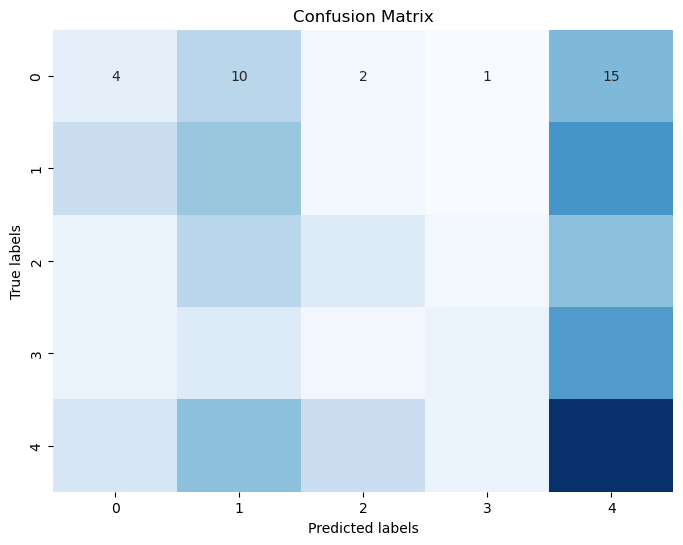

In [238]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(t)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [239]:
xx=[[1,20,5,8, 9, 5,9]]

In [240]:
ans = model5.predict(xx)
print(f" You are {ans}")

 You are [1]


In [241]:
from sklearn.pipeline import Pipeline

ssl = RobustScaler()


obj2 = SelectKBest(f_classif,k=4)
poly3 = PolynomialFeatures(3)
obj3 = SelectKBest(f_classif,k=10)
estimators = RandomForestClassifier(max_depth=8 , random_state=1)
sk_pipe = Pipeline([ ("rscale", ssl),
                    
                    ("obj2",obj2),
                    ('poly3', poly3),
                    ("obj3", obj3),
                    ('esti',estimators)])


In [242]:
x=df.drop(["Personality"], axis=1)

In [243]:
sk_pipe.fit(x.iloc[:,:],y)

Pipeline(steps=[('rscale', RobustScaler()), ('obj2', SelectKBest(k=4)),
                ('poly3', PolynomialFeatures(degree=3)),
                ('obj3', SelectKBest()),
                ('esti', RandomForestClassifier(max_depth=8, random_state=1))])

In [244]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [245]:
y1_pred = sk_pipe.predict(x.iloc[:,:])

In [246]:

reports = classification_report(y, y1_pred)
print("Report : \n{}".format(reports))

Report : 
              precision    recall  f1-score   support

           0       0.39      0.13      0.19       159
           1       0.40      0.54      0.46       227
           2       0.55      0.22      0.32       158
           3       0.44      0.26      0.33       166
           4       0.44      0.71      0.55       314

    accuracy                           0.43      1024
   macro avg       0.44      0.37      0.37      1024
weighted avg       0.44      0.43      0.40      1024



In [247]:
#saving machine learning model
import pickle
#save model 
pickle.dump(sk_pipe,open("pmodel.pkl","wb"))
model_g1 = pickle.load(open("pmodel.pkl","rb"))

In [248]:
dd=[[1,20,5,8, 9, 5,9]]

In [249]:
ans = model_g1.predict(dd)
print(f" You are {ans}")

 You are [1]
